In [1]:
import pandas as pd
import numpy as np
import evaluate
from tqdm.autonotebook import tqdm
from matplotlib import pyplot as plt

tqdm.pandas()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_data_gpt3 = pd.read_parquet("../data/generated_stories/generated_stories_gpt3_100.parquet")
df_data_no_gpt3 = pd.read_parquet("../data/generated_stories/generated_stories_non_gpt3_100.parquet")

In [3]:
df_data_gpt3.shape
df_data_gpt3.head(2)

(100, 15)

,InputStoryid,InputSentence1,InputSentence2,InputSentence3,InputSentence4,RandomFifthSentenceQuiz1,RandomFifthSentenceQuiz2,AnswerRightEnding,InputSentence5,outline,prompt,gen_stories_ada,gen_stories_babbage,gen_stories_curie,gen_stories_davinci
0,138d5bfb-05cc-41e3-bf2c-fa85ebad14e2,Rick grew up in a troubled household.,"He never found good support in family, and tur...",It wasn't long before Rick got shot in a robbery.,The incident caused him to turn a new leaf.,He is happy now.,He joined a gang.,1,He is happy now.,Rick grew up in a troubled household.\nHe neve...,Generate a multi-paragaph story using the foll...,\n\nRick was born in a troubled household.\nHe...,\nRick 1: \nRick was always a troubled youth. ...,\nRick grew up in a household full of turmoil....,\nRick grew up in a troubled household. His pa...
1,bff9f820-9605-4875-b9af-fe6f14d04256,Laverne needs to prepare something for her fri...,She decides to bake a batch of brownies.,She chooses a recipe and follows it closely.,Laverne tests one of the brownies to make sure...,The brownies are so delicious Laverne eats two...,Laverne doesn't go to her friend's party.,1,The brownies are so delicious Laverne eats two...,Laverne needs to prepare something for her fri...,Generate a multi-paragaph story using the foll...,\n\nLaverne had been following the recipe to m...,\nAs Laverne prepared to make her friend's cak...,\n\nLaverne had been planning her friend's bir...,\nLaverne was getting ready for her friend's p...


In [4]:
df_data_no_gpt3.shape
df_data_no_gpt3.head(2)

(100, 13)

,InputStoryid,InputSentence1,InputSentence2,InputSentence3,InputSentence4,RandomFifthSentenceQuiz1,RandomFifthSentenceQuiz2,AnswerRightEnding,InputSentence5,outline,prompt,gen_stories_gpt2,gen_stories_bloomz-1b7
0,138d5bfb-05cc-41e3-bf2c-fa85ebad14e2,Rick grew up in a troubled household.,"He never found good support in family, and tur...",It wasn't long before Rick got shot in a robbery.,The incident caused him to turn a new leaf.,He is happy now.,He joined a gang.,1,He is happy now.,Rick grew up in a troubled household.\nHe neve...,Generate a multi-paragaph story using the foll...,"Three days after Rick Grimes was shot, Rick Gr...",Rick grew up in a violent household and was ne...
1,bff9f820-9605-4875-b9af-fe6f14d04256,Laverne needs to prepare something for her fri...,She decides to bake a batch of brownies.,She chooses a recipe and follows it closely.,Laverne tests one of the brownies to make sure...,The brownies are so delicious Laverne eats two...,Laverne doesn't go to her friend's party.,1,The brownies are so delicious Laverne eats two...,Laverne needs to prepare something for her fri...,Generate a multi-paragaph story using the foll...,A New York City Foodie: How To Make A Big Brow...,Laverne bakes brownies for her friend's party\...


In [5]:
df_stories = df_data_gpt3[['InputStoryid', 'outline', 'prompt', 
                           'gen_stories_ada', 'gen_stories_babbage', 
                           'gen_stories_curie', 'gen_stories_davinci']].copy()
df_stories = df_stories.merge(df_data_no_gpt3[['InputStoryid', 'gen_stories_gpt2', 'gen_stories_bloomz-1b7']], on='InputStoryid')

In [6]:
df_stories['gen_stories_gpt2'] = df_stories['gen_stories_gpt2'].str.replace('<|endoftext|>', '', regex=False)
df_stories['gen_stories_bloomz-1b7'] = df_stories['gen_stories_bloomz-1b7'].str.replace('<pad>', '', regex=False)

In [7]:
df_stories.shape
df_stories.head(2)

(100, 9)

,InputStoryid,outline,prompt,gen_stories_ada,gen_stories_babbage,gen_stories_curie,gen_stories_davinci,gen_stories_gpt2,gen_stories_bloomz-1b7
0,138d5bfb-05cc-41e3-bf2c-fa85ebad14e2,Rick grew up in a troubled household.\nHe neve...,Generate a multi-paragaph story using the foll...,\n\nRick was born in a troubled household.\nHe...,\nRick 1: \nRick was always a troubled youth. ...,\nRick grew up in a household full of turmoil....,\nRick grew up in a troubled household. His pa...,"Three days after Rick Grimes was shot, Rick Gr...",Rick grew up in a violent household and was ne...
1,bff9f820-9605-4875-b9af-fe6f14d04256,Laverne needs to prepare something for her fri...,Generate a multi-paragaph story using the foll...,\n\nLaverne had been following the recipe to m...,\nAs Laverne prepared to make her friend's cak...,\n\nLaverne had been planning her friend's bir...,\nLaverne was getting ready for her friend's p...,A New York City Foodie: How To Make A Big Brow...,Laverne bakes brownies for her friend's party\...


In [12]:
df_data_gpt3[['InputSentence1', 'InputSentence2', 'InputSentence3', 'InputSentence4', 'InputSentence5']].to_dict('records')[0]

{'InputSentence1': 'Rick grew up in a troubled household.',
 'InputSentence2': 'He never found good support in family, and turned to gangs.',
 'InputSentence3': "It wasn't long before Rick got shot in a robbery.",
 'InputSentence4': 'The incident caused him to turn a new leaf.',
 'InputSentence5': 'He is happy now.'}

In [13]:
df_stories['outline'][0]

"Rick grew up in a troubled household.\nHe never found good support in family, and turned to gangs.\nIt wasn't long before Rick got shot in a robbery.\nThe incident caused him to turn a new leaf.\nHe is happy now."

## Evaluation

In [8]:
# outline = """Jim found an old disposable camera in the bottom of his junk drawer.
# He began snapping away at everything around him.
# The counter clicked down to one final photo.
# The gravity of the situation began to dawn on Jim.
# Jim took time to decide what he would take a picture of."""

In [9]:
# final_story = """Jim had always been a photo enthusiast, even as a kid. He loved exploring new places, taking pictures of the natural beauty around him, and capturing special moments with those he loved. But never before had he found such freedom in taking photos--and such a sense of immediacy.

# So Jim began to snap away at anything and everything around him. He would go out on walks with his dog, stop in at the grocery store, or sit at his desk at work--and snap away. The Counter turned to one final photo before disappearing for good. In each photo, Jim captured a fleeting moment that he could cherish forever.

# Gradually though, Jim realized just how precarious this new way of life was. Every time he snapped a picture, something could happen that would overwrite that moment forever with uncertainty and worry. Suddenly taking pictures became quite solemn and meaningful for Jim--it was now more than just a way to capture fleeting moments; it was an act of preservation and commemoration.

# And so Jim began to take pictures of things that meant the most to him: his wife and kids during family dinners, positive memories from trips abroad, happy moments spent with friends and family...absolutely anything that tempted fate but ultimately ended up being worth preserving anyways. And gradually as he took more photos like this, the gravity of the situation began to dawn on Jim...he wasn't just preserving moments anymore; he was documenting history!"""

In [10]:
bleu = evaluate.load("bleu")
# results = bleu.compute(predictions=[final_story], references=[outline])
# results

In [11]:
perplexity = evaluate.load("perplexity", module_type="metric")
# results = perplexity.compute(predictions=[final_story], model_id='gpt2', device='cpu')
# results

In [12]:
rouge = evaluate.load('rouge')
# results = rouge.compute(predictions=[final_story], references=[outline])
# results

In [13]:
bertscore = evaluate.load('bertscore')
# results = bertscore.compute(predictions=[final_story], references=[outline], model_type="distilbert-base-uncased")
# results

### gen_stories_ada

In [14]:
# eval_dict = {}

In [15]:
# story_col = 'gen_stories_ada'
# eval_dict[story_col] = {}

In [16]:
# eval_dict[story_col]['bleu'] = bleu.compute(predictions=df_stories[story_col].tolist(), 
#                                  references=df_stories['outline'].tolist())
# eval_dict[story_col]['bleu']

In [17]:
# eval_dict[story_col]['perplexity'] = perplexity.compute(predictions=df_stories[story_col].tolist(), 
#                                              model_id='distilgpt2',
#                                              device='cpu')
# eval_dict[story_col]['perplexity']

In [18]:
# eval_dict[story_col]['rouge'] = rouge.compute(predictions=df_stories[story_col].tolist(), 
#                                    references=df_stories['outline'].tolist())
# eval_dict[story_col]['rouge']

In [19]:
# eval_dict[story_col]['bertscore'] = bertscore.compute(predictions=df_stories[story_col].tolist(), 
#                                            references=df_stories['outline'].tolist(), 
#                                            model_type="distilbert-base-uncased")
# eval_dict[story_col]['bertscore']

In [20]:
eval_dict = {}

reference_col = 'outline'
# reference_col = 'gen_stories_davinci'
story_cols = ['gen_stories_gpt2', 'gen_stories_bloomz-1b7', 'gen_stories_ada', 
              'gen_stories_babbage', 'gen_stories_curie', 'gen_stories_davinci']

for story_col in story_cols:
    eval_dict[story_col] = {}
    eval_dict[story_col]['bleu'] = bleu.compute(predictions=df_stories[story_col].tolist(), 
                                                 references=df_stories[reference_col].tolist())
    eval_dict[story_col]['perplexity'] = perplexity.compute(predictions=df_stories[story_col].tolist(), 
                                                 model_id='distilgpt2',
                                                 device='cpu')
    eval_dict[story_col]['rouge'] = rouge.compute(predictions=df_stories[story_col].tolist(), 
                                                 references=df_stories[reference_col].tolist())
    eval_dict[story_col]['bertscore'] = bertscore.compute(predictions=df_stories[story_col].tolist(), 
                                                 references=df_stories[reference_col].tolist(), 
                                                 model_type="distilbert-base-uncased")

Using pad_token, but it is not set yet.


  0%|          | 0/7 [00:00<?, ?it/s]

Using pad_token, but it is not set yet.


  0%|          | 0/7 [00:00<?, ?it/s]

Using pad_token, but it is not set yet.


  0%|          | 0/7 [00:00<?, ?it/s]

Using pad_token, but it is not set yet.


  0%|          | 0/7 [00:00<?, ?it/s]

Using pad_token, but it is not set yet.


  0%|          | 0/7 [00:00<?, ?it/s]

Using pad_token, but it is not set yet.


  0%|          | 0/7 [00:00<?, ?it/s]

In [21]:
# len(eval_dict['gen_stories_ada']['bertscore']['precision'])

In [22]:
eval_dict_cleaned = {}
for story_col in story_cols:
    story_col_2 = story_col.replace('gen_stories_', '')
    eval_dict_cleaned[story_col_2] = {}
    eval_dict_cleaned[story_col_2]['bleu'] = round(eval_dict[story_col]['bleu']['bleu'], 2)
    eval_dict_cleaned[story_col_2]['perplexity'] = round(eval_dict[story_col]['perplexity']['mean_perplexity'], 2)
    eval_dict_cleaned[story_col_2]['rouge1'] = round(eval_dict[story_col]['rouge']['rouge1'], 2)
    eval_dict_cleaned[story_col_2]['rouge2'] = round(eval_dict[story_col]['rouge']['rouge2'], 2)
    eval_dict_cleaned[story_col_2]['rougeL'] = round(eval_dict[story_col]['rouge']['rougeL'], 2)
    eval_dict_cleaned[story_col_2]['rougeLsum'] = round(eval_dict[story_col]['rouge']['rougeLsum'], 2)
    eval_dict_cleaned[story_col_2]['bertscore_mean_precision'] = round(np.mean(eval_dict[story_col]['bertscore']['precision']), 2)
    eval_dict_cleaned[story_col_2]['bertscore_mean_recall'] = round(np.mean(eval_dict[story_col]['bertscore']['recall']), 2)
    eval_dict_cleaned[story_col_2]['bertscore_mean_f1'] = round(np.mean(eval_dict[story_col]['bertscore']['f1']), 2)

In [23]:
df_eval = pd.DataFrame.from_dict(eval_dict_cleaned)
df_eval

,gpt2,bloomz-1b7,ada,babbage,curie,davinci
bleu,0.01,0.22,0.19,0.21,0.16,0.07
perplexity,18.88,91.76,70.76,27.74,25.82,32.66
rouge1,0.15,0.45,0.46,0.54,0.48,0.29
rouge2,0.03,0.28,0.31,0.35,0.27,0.14
rougeL,0.10,0.37,0.38,0.44,0.38,0.23
rougeLsum,0.14,0.43,0.45,0.50,0.43,0.27
bertscore_mean_precision,0.70,0.81,0.80,0.84,0.82,0.75
bertscore_mean_recall,0.77,0.84,0.88,0.90,0.90,0.90
bertscore_mean_f1,0.73,0.82,0.84,0.87,0.86,0.82


<AxesSubplot: >

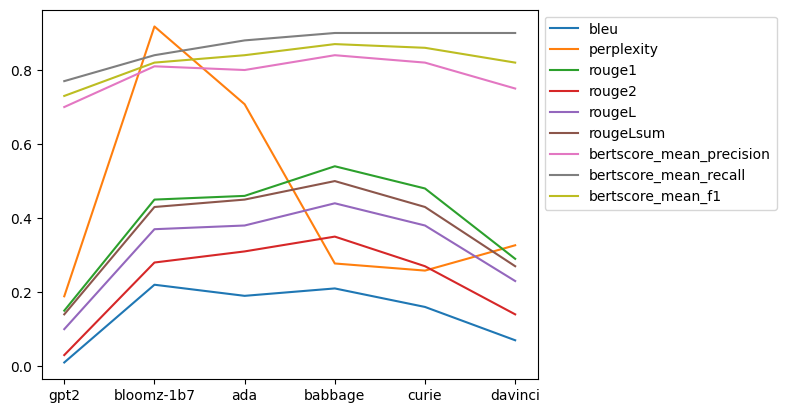

In [34]:
df_eval_plot = df_eval.T.copy()
df_eval_plot['perplexity'] = df_eval_plot['perplexity'] / 100
# df_eval_plot['perplexity']['gpt2'] = 1
# df_eval_plot = df_eval_plot.drop('perplexity', axis=1)
df_eval_plot.plot()
plt.legend(bbox_to_anchor=(1, 1))

In [33]:
df_eval.to_clipboard()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Stories

In [26]:
story_id = 11

In [27]:
print(df_stories['outline'][story_id])

Ignacio wants to play a sport while he is in college.
Since he was a good swimmer, he decides to try out for swim the team.
Ignacio makes it onto the team easily.
At the first swim meet, Ignacio wins second place!
Ignacio won a silver medal.


In [28]:
print(df_stories['gen_stories_gpt2'][story_id])

This story ends at the first round of the French Open.
The story starts with a girl as she enters a bar.
The story ends with Ignacio's head flying in the air while he is at the bar.
On the fourth round, Ignacio gets his bronze medal.
On the fifth round, Ignacio gets his bronze medal.
On the sixth round, Ignacio gets his bronze medal.
The story ends with a story from the team.
The story begins with a group of girls as they go to the beach in the park of Saint Pompon.
On the sixth round, the girls are at the beach.
On the seventh round, the girls are at the beach.
One of them says "This is great, I'm very happy."
The next moment, Ignacio's body is in a pool.
The next moment, he is floating under the water.
There is a very awkward moment in the story. The story ends with a girl saying "A very proud girl" when the girl says "I'm very proud of you."
Here are a few interesting things:
The story starts in Saint Pompon.
The story ends with a short story.
And here is a short story:


In [29]:
print(df_stories['gen_stories_bloomz-1b7'][story_id])

At the first meet, Ignacio swims very well. He runs well. He does not take any risks and wins easily. The team is very surprised by his performance at the first swim meet. Ignacio does not take any risks and wins easily. The team is very surprised by his performance at the first swim meet.</s>


In [30]:
print(df_stories['gen_stories_ada'][story_id])



 Ignacio is in college and he's a swimmer. He wants to play a sport, so he tries out for the team. He makes it onto the team easily. At the first swim meet, Ignacio wins second place! This makes him very proud and he is very excited to finally be playing in a competition!


In [31]:
print(df_stories['gen_stories_babbage'][story_id])



Ignacio was so excited to try out for swim the team his first year of college. He quickly made it onto the team and excelled, winning second place in his division. The next meet, Ignacio won a silver medal. This continued to go well for him as he won more medals and cups until finally he set the world record in a major event. With this new record, Ignacio became an expert swimmer and was able to secure a scholarship tocollege.


In [35]:
print(df_stories['gen_stories_curie'][story_id])



Ignacio loved swimming ever since he was able to swim competently. He had always wanted to try out for a swim team, so when he saw an opportunity to do so while in college, he took it. He made it onto the team easily and at the first swim meet, he won second place! Ignacio was ecstatic and thrilled with his win. However, his joy was short-lived as he learned that he had also won a silver medal. This made him even more proud of himself and gave him a boost of confidence for future swim meets.


In [32]:
print(df_stories['gen_stories_davinci'][story_id])


Ignacio had been considering playing a sport in college. He had played sports in high school, but swimming was always his favorite. With that in mind, he decided to try out for the swim team at his college.

When Ignacio arrived for the tryouts, he saw several swimmers already competing and knew it would be tough competition. However, Ignacio was a good swimmer and performed well during the tryouts. After being evaluated by the coach and showing off his skills in the pool, Ignacio made it onto the team easily. 

At their first swim meet of the season, everyone was excited to see what they could do as a team. There were some excellent swimmers competing against them, so everyone on the team knew they had their work cut out for them! During one of his events, Ignacio amazed everyone when he came in second place! Everyone cheered him on as he won a silver medal and brought pride to his team. 

Ignacio was proud of himself for making it onto an elite college swim team and doing so well at

## Stories - 2

In [42]:
story_id = 15

In [43]:
print(df_stories['outline'][story_id])

Jesse had just started fifth grade.
He tried to make friends with the other boys, but he couldn't.
He decided to make friends with the girls instead.
They girls welcomed him into their social groups happily.
Jesse was picked on by the other boys in school.


In [44]:
print(df_stories['gen_stories_gpt2'][story_id])

The other boys tried to take advantage of him, but Jesse just ignored them.
The boy who did this started to bully the girl who was doing the bullying.
Then there was the boy who did all of this, with the assistance of Jesse's father.
As he started getting more and more friends, the boy started to bully Jesse, but he never hit his partner.
The girl who had started this bullying had been fighting to get Jesse to stop, and the boy began to fight to get her to stop, and he didn't.
But this did not stop his behavior from escalating.
But eventually, Jesse would start to get the girl to stop, and the boy would attack her.
After this, the girl and Jesse started to fight, but when Jesse started to fight back, he got up and started hitting her.
Jesse, his father, and the other girls in the girls group became friends, because they all knew how much they liked each other and how much they knew each other.
Jesse started to lose friends, and he started to get worse.
They were friends that Jesse alwa

In [45]:
print(df_stories['gen_stories_bloomz-1b7'][story_id])

Jesse went home and cried. The girls and the other boys started laughing at him.
He decided to make friends with the girls instead. They girls welcomed him into their social groups happily.</s>


In [46]:
print(df_stories['gen_stories_ada'][story_id])



Jesse had tried his best to make friends with the other boys in school, but he just couldn't.
The other boys picked on him and it was just another thing that made his life harder.
But when he went to their girls' schools, they wereidently doing better.
Jesse decided to make some new friends at a social group for girls and he was holes into them happily.
 Jesse loved spending time with his new friends and he loved being one of the only girls in the group.


In [47]:
print(df_stories['gen_stories_babbage'][story_id])



Jesse tried to make friends with the other boys in school, but he couldn't. He decided to make friends with the girls instead. They girls welcomed him into their social groups happily. The other boys in school started picking on Jesse and making fun of him. Jesse felt left out and abandoned by the girls.


In [48]:
print(df_stories['gen_stories_curie'][story_id])



Jesse had always been a shy guy. He was worried that he wouldn't be able to make friends and fit in with the other boys in his class. But, after some trial and error, Jesse realized that making friends with the girls was the best strategy for him. They welcomed him warmly into their groups and didn't treat him like he was an outsider. Jesse learned that it's important to have both male and female friends to feel comfortable in any social setting. As long as Jesse maintains a healthy balance of male and female friends, he'll be sure to have a positive social experience no matter where he goes in life.


In [49]:
print(df_stories['gen_stories_davinci'][story_id])


Jesse had just started fifth grade. He was the new kid and he wasn't sure how to fit in. He tried to make friends with the other boys, but they weren't too receptive of him. No matter how hard Jesse tried, it seemed that the boys always treated him with cold indifference which left him feeling lonely and isolated. 

Desperate for companionship, Jesse decided to try a different approach; he decided to make friends with the girls instead. Surprisingly, the girls welcomed him into their social groups happily without any hesitation or judgement. Soon enough, Jesse found himself surrounded by a group of kind and caring female friends who genuinely wanted what was best for him and accepted him for who he was.

Unfortunately, even though things were going well for Jesse on one front, he still faced challenges from his male classmates at school. The other boys consistently gave Jesse a hard time about being in the company of girls rather than them leading to some pretty shameful moments for p